## Explanation Mathematics Background

As of Minute 1:30:30

- Picture can be represented as a matrix of numbers
- these pics ( e.g. 3 types of bears) get turned into 3 probabilities
- functions like argmax then find the highest probability and return the index
- example learn.predict??
- error_rate?? to check, what the error rate actually is
- note: metrics are always applied to the validation set (not training set)
- conv_learner is now called cnn_...
- try doc(accuracy)

https://www.youtube.com/watch?v=q6DGVGJ1WP4

In [1]:
%matplotlib inline
from fastai import *

In [2]:
doc(accuracy)

In [3]:
learn.predict??

Object `learn.predict` not found.


In [4]:
error_rate??

check Adam Geitgey on medium: https://medium.com/@ageitgey

check Khan Academy for math concepts
simple reformulation
- y = ax + b
- y = a1x + a2 * 1
- y = a1X1 + a2X2 where iX2 = 1 --> dot product
- yvector = X avector
http://matrixmultiplication.xyz/

We use linear algebra to avoid loops

Q&A:
- data: usually one needs less than needed. But there is no way to know upfront, how much data is needed
- unbalanced data: like 3 brown bears and 50 grizzlies. Typically, works in practice well! 
    Check for oversampling paper: take uncommon class and copy (in praxis hardly needed)

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

Stochastic gradient Descent: A computer tries to fit a line with some of the data (stistical). This is a bottom approach now

In [5]:
n=100

In [6]:
x = torch.ones(n,2)## get me a rank 2 tensor: n x 2 with n number of rows and number of columns 2

x[:,0].uniform_(-1,1) ## index into that, the : means get all single values on that axis (here row) then column 0
## _ in uniform_ means replace that x[:,0] with random numbers between -1 and 1 
x[:5] ## give me the 1st 5 rows. x was tranformed before

tensor([[-0.9735,  1.0000],
        [-0.8841,  1.0000],
        [-0.4805,  1.0000],
        [-0.8058,  1.0000],
        [-0.7175,  1.0000]])

In [7]:
a = tensor([3.,2]); a
## create some coefficients OLD: a = tensor(3.,2);
## tensor: same like array of a regular shape (all rows / column with same amount column / row)
## width by height but sometimes number of rows x number of colums
## an image e.g. is a 3d tensor: rows, columns, colours
## rank: how many axis, dimensions are there, an image has 3 ranks
## tensor([3., 2.]) is a rank 1 tensor (=vector) with 3 as slope, 2 as intercept 
## we take (see above) that 1 vector ax + b with second x value always 1 to simplify things

tensor([3., 2.])

In [8]:
## x@a is a matrix (vector) product
## in pytorch @ can mean higher rank tensors
y = x@a + torch.rand(n) ## random numbers to have some noise
## pytorch: create a tensor of n by 2. we passed in 2 thungs with rows n, columns 2. All in there is 1

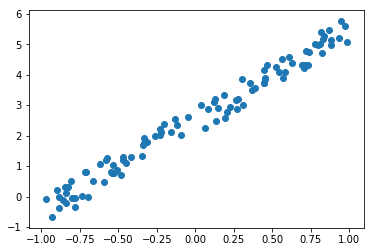

In [9]:
## we can index into that array: every row 0 of column zero
plt.scatter(x[:,0], y); ## plot 0 index column
## plt is plotting library mathplotlib: most people use this for most plotting
## other packages are better at special other things, but matplotlib can do all pretty well

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

Note, this simple technique works equally well for 50 million numbers in resnet34. So we use SGD also for complex Neural Networks. We cannot conceptualise such large equations.

pytorch parameters are often called in statistics coefficients.

In [10]:
def mse(y_hat, y): return ((y_hat-y)**2).mean() ## y_hat icecream, y temperature. both rank 1 tensors
## this thing gives the distance between plotted and the line we create to fit this
## same as the math notation, only for code: https://en.wikipedia.org/wiki/Mean_squared_error
## Question, what is the line?

Suppose we believe `a = (1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [11]:
a = tensor([-1.,1]) ## the . in 1. makes sure it becomes a float

## why is there a -1 ?

In [12]:
a.type()

'torch.FloatTensor'

In [13]:
y_hat = x@a
mse(y_hat, y)

tensor(8.2032)

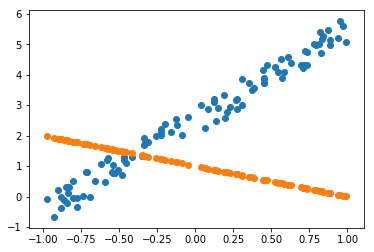

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

Calculus Derivative: how does changing one thing affect the other.

https://medium.com/@rohitrpatil/the-matrix-calculus-you-need-for-deep-learning-notes-from-a-paper-by-terence-parr-and-jeremy-4f4263b7bb8

https://www.youtube.com/watch?v=WUvTyaaNkzM

How do we make it better?

We only have the intercept and the gradieng

- Gradient decent: what if the intercept is a little higher / lower & gradient a little more positive / negative
- there are 4 options
- Whatever 'made it better', this is what we will do
- Now: instead of really moving up down, rotating, we can use the derivative

Derivative / Gradient: how will change a1, a2 up or down change the MSE (quicker than _really_ calculating this), i.e. will movig up down or tilting gradient up down make it better.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.


Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [15]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [23]:
## as of Minute 2:18
## We call a function called update a 100 times in below loop to calculate the loss (mse) and prediction (yhat).
## In pytorch we calculate the gradient with a function called backward. Pytorch keeps track of attrbute .grad
def update():
    y_hat = x@a ## for stochastic gradient descent: randomise this and we use a mini batch then
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss) ## we print the loss from time to time
    
    ## pytorch keeps track for us, how the loss was calculated and lets us calculate the derivative    
    loss.backward() ## pytorch derivative, calculate the gradient
    ## pytorch places the derivative into the attribute a.grad of the cofficient
    
    with torch.no_grad(): ## turn off (...)
        ## we take the coefficient (see above) and subtract from it the gradient
        ## the underscore _ does that in place
        
        a.sub_(lr * a.grad) ## derivative goes to attribute grad sub_updates coefficients and subtracts the gradients
        
        ## Why subtract the gradient? Because gradient tells us, if I move down (up), loss goes up (down)
        ## We want to 'do the opposite' of what makes it go up in order to reduce the loss
        ## Minute 2:20:50
        ## lr = learning rate: so that is multiplying the gradient
        ## why is there any lr at all?
            ## Gradient graphically can be seen as the slope, it 'tells you' which direction to go down 
            ## and if to go 'a bit or quite far'
        ## Learning Rate is a number < 1 so we do not jump too far
        ## When the learning rate is too high, we 'jump' over the right answer and things go worse
        ## When the learning rate is too low, it takes too long
        ## We want sth that gets into the right zone fast and then make tiny steps to find the best answer

        a.grad.zero_() 
        ## Later, minor issues
            ## zero out gradients (later)
            ## Gradient Calculation turned off, when SGD update

In [17]:
lr = 1e-1
for t in range(100): update()

tensor(8.2032, grad_fn=<MeanBackward1>)
tensor(1.3535, grad_fn=<MeanBackward1>)
tensor(0.3595, grad_fn=<MeanBackward1>)
tensor(0.1415, grad_fn=<MeanBackward1>)
tensor(0.0924, grad_fn=<MeanBackward1>)
tensor(0.0813, grad_fn=<MeanBackward1>)
tensor(0.0788, grad_fn=<MeanBackward1>)
tensor(0.0782, grad_fn=<MeanBackward1>)
tensor(0.0781, grad_fn=<MeanBackward1>)
tensor(0.0780, grad_fn=<MeanBackward1>)


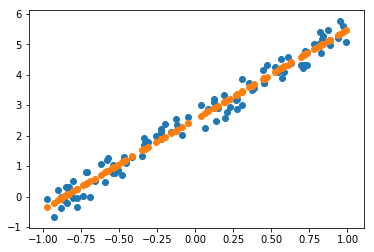

In [18]:
## var.detach().numpy() ?
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [19]:
from matplotlib import animation, rc
rc('animation', html='html5')

You'll need to uncomment the following to install the necessary plugin the first time you run this:

In [20]:
## Instead of sudo try## from matplotlib import animation, rc## rc('animation', html='jshtml') ##! sudo apt-get install dirmngr ## https://unix.stackexchange.com/questions/401547/gpg-keyserver-receive-failed-no-dirmngr
##! sudo add-apt-repository ppa:mc3man/trusty-media  
## Fails
## gpg: keybox '/tmp/tmpmz57z_t0/pubring.gpg' created
## gpg: /tmp/tmpmz57z_t0/trustdb.gpg: trustdb created
## gpg: key 90BD7EACED8E640A: public key "Launchpad PPA for Doug McMahon" imported
## gpg: no ultimately trusted keys found
## gpg: Total number processed: 1
## gpg:               imported: 1
## gpg: no valid OpenPGP data found.
##! sudo apt-get update  
##! sudo apt-get install ffmpeg  
##! sudo apt-get install frei0r-plugins 

In [22]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
## as before, create a scatter plot
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    ## see update function from above
    update()
    ## update the ydata in our line
    line.set_ydata(x@a)
    return line,
## instead of a loop we use animation.FuncAnimation. Call animate 100x
animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

Animations matter, we cannot easily do that for a large neural network.

## Vocab

- **Learning rate**: 
    - the thing we multiply the gradient by to decide how much to update the weights
- **Epoch**: 
    - 1 complete run through all datapoints , images
    - Non Stochastic: all data sets in every single loop
    - Stochastic:  1 Epoch = 1000 images, mini batch size = 100, so 10 _iterations_ to see all
    - we want to avoid too many epochs, because if we look at image a lot of times, hence bigger chance of overfitting
- **Minibatch**:
    - loss on half a million images too slow. so we take 64 random images, see SGD
    - random points used to update your weights
- **Stochastic Gradient Descent**: 
    - means we just take lets say 64 random images and update weights. Otherwise this is too slow
    - Gradient Descent with MiniBatches
- **Model** / **Architecture**: 
    - similar things
    - mathematical function we fit to
    - here Y =xa
    - resnet : more details to follow, matrix products
- **Parameters** / **Coefficients** / **Weights**:
    - thing we update
- **Loss function**:
    - how close or far you are to the correct answer

For classification problems, we use **cross entropy loss**, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

Note, **Regression** is concerned with predicting a single number. *Classification* gives several numbers. It is a similar process.

## Regularisation

What if we cannot fit a simple line?

Validation set, scroll to High Bias: https://www.quora.com/What-is-the-best-way-to-explain-the-bias-variance-trade-off-in-layman%E2%80%99s-terms

Is it a good idea to have the right parameters? No, instead Regularisation is an important topic.

Key is to check, how well the Model work on Data that was not yet seen by the Model. We use the Loss Function to check there, how the model performs.

https://www.fast.ai/2017/11/13/validation-sets/